In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Obfuscated-MalMem2022.csv')
print("Dataset shape:", df.shape)
df.head()

Dataset shape: (58596, 57)


,Category,pslist.nproc,pslist.nppid,pslist.avg_threads,pslist.nprocs64bit,pslist.avg_handlers,dlllist.ndlls,dlllist.avg_dlls_per_proc,handles.nhandles,handles.avg_handles_per_proc,...,svcscan.kernel_drivers,svcscan.fs_drivers,svcscan.process_services,svcscan.shared_process_services,svcscan.interactive_process_services,svcscan.nactive,callbacks.ncallbacks,callbacks.nanonymous,callbacks.ngeneric,Class
0,Benign,45,17,10.555556,0,202.844444,1694,38.500000,9129,212.302326,...,221,26,24,116,0,121,87,0,8,Benign
1,Benign,47,19,11.531915,0,242.234043,2074,44.127660,11385,242.234043,...,222,26,24,118,0,122,87,0,8,Benign
2,Benign,40,14,14.725000,0,288.225000,1932,48.300000,11529,288.225000,...,222,26,27,118,0,120,88,0,8,Benign
3,Benign,32,13,13.500000,0,264.281250,1445,45.156250,8457,264.281250,...,222,26,27,118,0,120,88,0,8,Benign
4,Benign,42,16,11.452381,0,281.333333,2067,49.214286,11816,281.333333,...,222,26,24,118,0,124,87,0,8,Benign


In [2]:
df.drop(columns = 'Category', axis = 1, inplace = True)

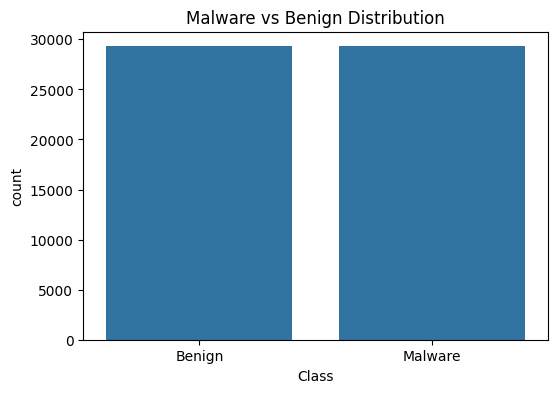

Class
Benign     0.5
Malware    0.5
Name: proportion, dtype: float64


In [3]:
# Target variable analysis
plt.figure(figsize=(6, 4))
sns.countplot(x='Class', data=df)
plt.title('Malware vs Benign Distribution')
plt.show()

# Class ratio
print(df['Class'].value_counts(normalize=True))

In [5]:
df.columns

Index(['pslist.nproc', 'pslist.nppid', 'pslist.avg_threads',
       'pslist.nprocs64bit', 'pslist.avg_handlers', 'dlllist.ndlls',
       'dlllist.avg_dlls_per_proc', 'handles.nhandles',
       'handles.avg_handles_per_proc', 'handles.nport', 'handles.nfile',
       'handles.nevent', 'handles.ndesktop', 'handles.nkey', 'handles.nthread',
       'handles.ndirectory', 'handles.nsemaphore', 'handles.ntimer',
       'handles.nsection', 'handles.nmutant', 'ldrmodules.not_in_load',
       'ldrmodules.not_in_init', 'ldrmodules.not_in_mem',
       'ldrmodules.not_in_load_avg', 'ldrmodules.not_in_init_avg',
       'ldrmodules.not_in_mem_avg', 'malfind.ninjections',
       'malfind.commitCharge', 'malfind.protection',
       'malfind.uniqueInjections', 'psxview.not_in_pslist',
       'psxview.not_in_eprocess_pool', 'psxview.not_in_ethread_pool',
       'psxview.not_in_pspcid_list', 'psxview.not_in_csrss_handles',
       'psxview.not_in_session', 'psxview.not_in_deskthrd',
       'psxview.not_in_p

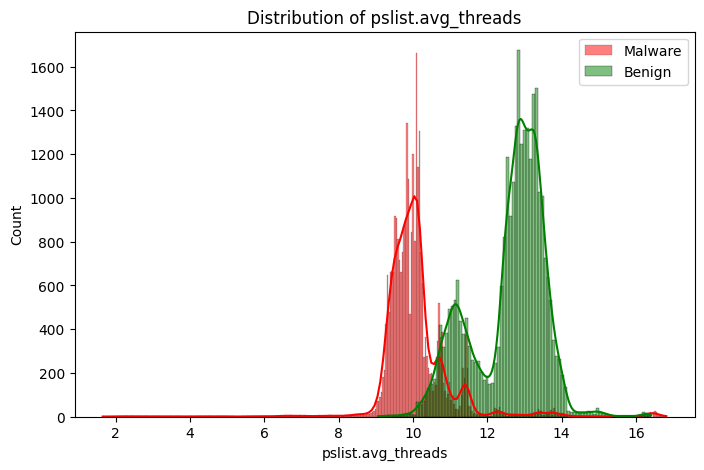

In [4]:
# Plot feature distributions for malware vs benign
malware = df[df['Class'] == 'Malware']
benign = df[df['Class'] == 'Benign']

# Example: Compare a numerical feature (e.g., 'Threads')
plt.figure(figsize=(8, 5))
sns.histplot(malware['pslist.avg_threads'], color='red', label='Malware', kde=True)
sns.histplot(benign['pslist.avg_threads'], color='green', label='Benign', kde=True)
plt.title('Distribution of pslist.avg_threads')
plt.legend()
plt.show()

In [7]:
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values[missing_values > 0])

Missing values:
 Series([], dtype: int64)


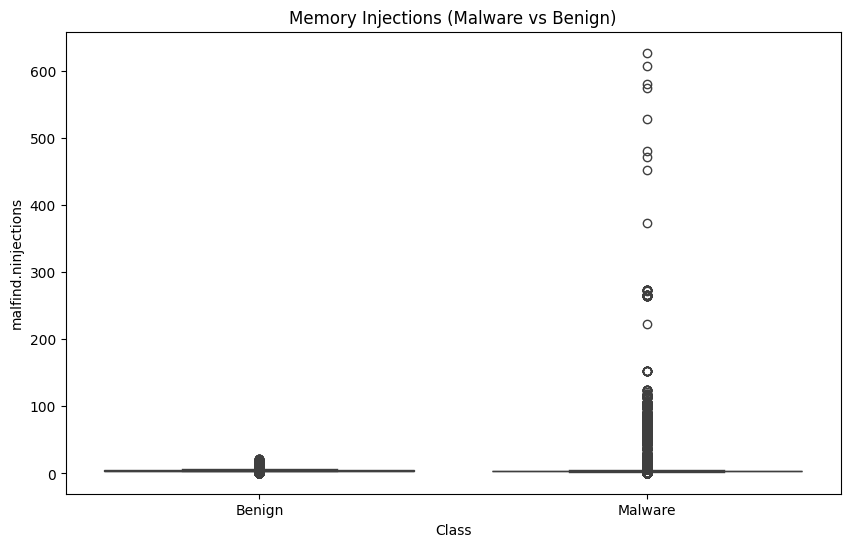

In [8]:
# Example: Compare "malfind.ninjections" between classes
plt.figure(figsize=(10, 6))
sns.boxplot(x='Class', y='malfind.ninjections', data=df)
plt.title('Memory Injections (Malware vs Benign)')
plt.show()

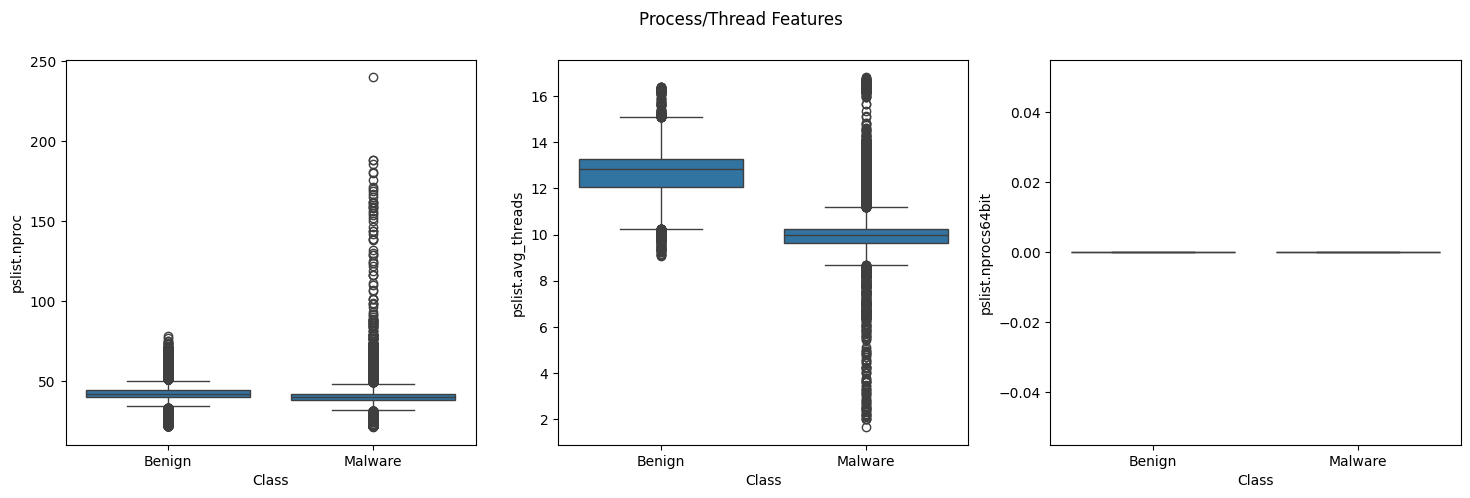

In [9]:
# Analyze process/thread features
ps_features = ['pslist.nproc', 'pslist.avg_threads', 'pslist.nprocs64bit']
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for i, feat in enumerate(ps_features):
    sns.boxplot(x='Class', y=feat, data=df, ax=axes[i])
plt.suptitle('Process/Thread Features')
plt.show()

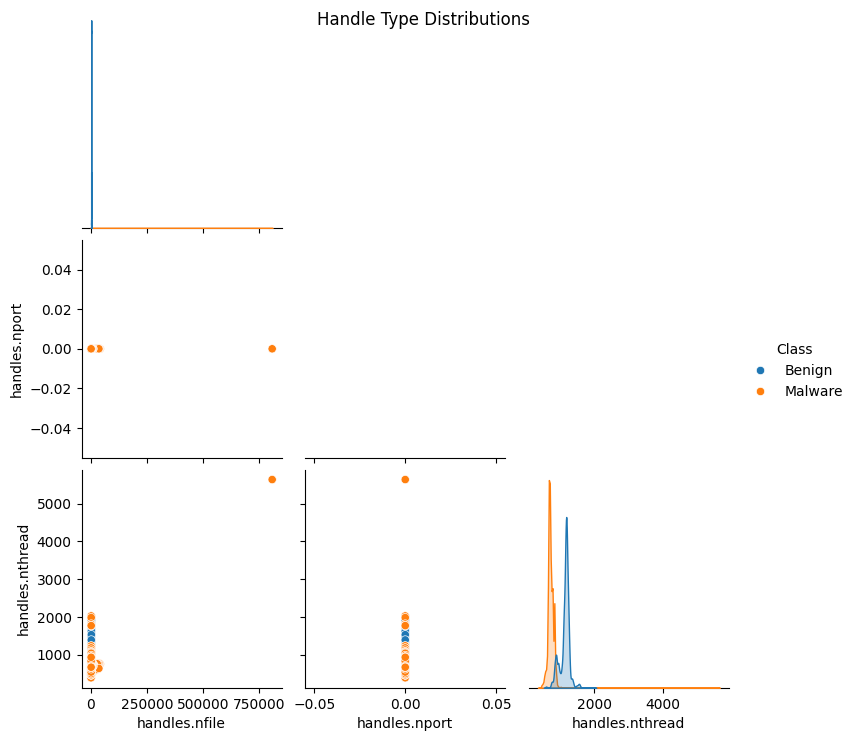

In [10]:
# Handle types (files, ports, etc.)
handle_features = ['handles.nfile', 'handles.nport', 'handles.nthread']
sns.pairplot(df[handle_features + ['Class']], hue='Class', corner=True)
plt.suptitle('Handle Type Distributions')
plt.show()

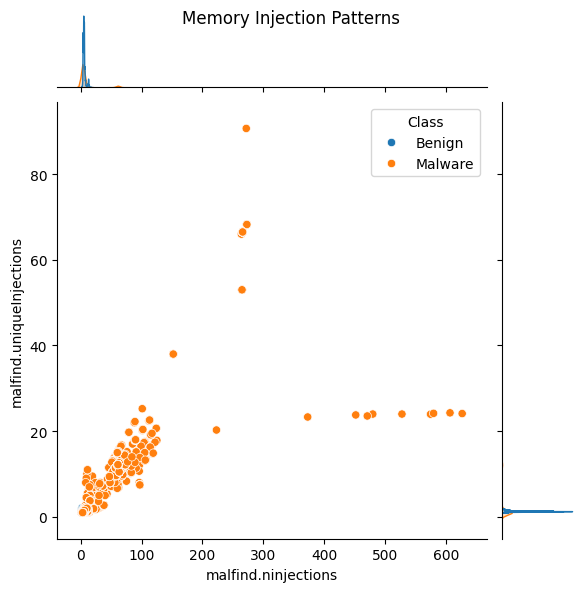

In [11]:
# Memory injection features
malfind_features = ['malfind.ninjections', 'malfind.uniqueInjections']
sns.jointplot(data=df, x='malfind.ninjections', y='malfind.uniqueInjections', hue='Class')
plt.suptitle('Memory Injection Patterns')
plt.show()

In [14]:
# Encode the target variable (if not already done)
df['Class'] = df['Class'].map({'Malware': 1, 'Benign': 0})

# Calculate correlation of all features with the target
corr_with_target = df.corr(numeric_only=True)['Class'].abs().sort_values(ascending=False)

# Display all features sorted by correlation strength
print("Correlation with 'Class' (sorted by absolute value):\n")
print(corr_with_target.to_string())  # Show all features

Correlation with 'Class' (sorted by absolute value):

Class                                     1.000000
dlllist.avg_dlls_per_proc                 0.908555
handles.nevent                            0.876770
handles.nthread                           0.872531
handles.nmutant                           0.855148
dlllist.ndlls                             0.823933
handles.nsection                          0.820967
pslist.avg_threads                        0.790666
ldrmodules.not_in_load                    0.787472
ldrmodules.not_in_mem                     0.787413
handles.ntimer                            0.783137
handles.nsemaphore                        0.769097
svcscan.process_services                  0.763656
ldrmodules.not_in_init                    0.716578
svcscan.shared_process_services           0.710979
handles.nkey                              0.698239
svcscan.nactive                           0.653268
svcscan.nservices                         0.631078
pslist.nppid                

In [21]:
df['handles.nport'].value_counts()

handles.nport
0    58596
Name: count, dtype: int64

In [23]:
df['pslist.nprocs64bit'].value_counts()

pslist.nprocs64bit
0    58596
Name: count, dtype: int64

In [24]:
df['svcscan.interactive_process_services'].value_counts()

svcscan.interactive_process_services
0    58596
Name: count, dtype: int64

In [25]:
df.drop(columns=['pslist.nprocs64bit',
'handles.nport',
'svcscan.interactive_process_services'],
       axis = 1,
       inplace =True)
df.shape

(58596, 53)

C:\Users\Naruto\AppData\Local\Temp\ipykernel_2920\136614063.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr_with_target[1:21].values, y=corr_with_target[1:21].index, palette='viridis')


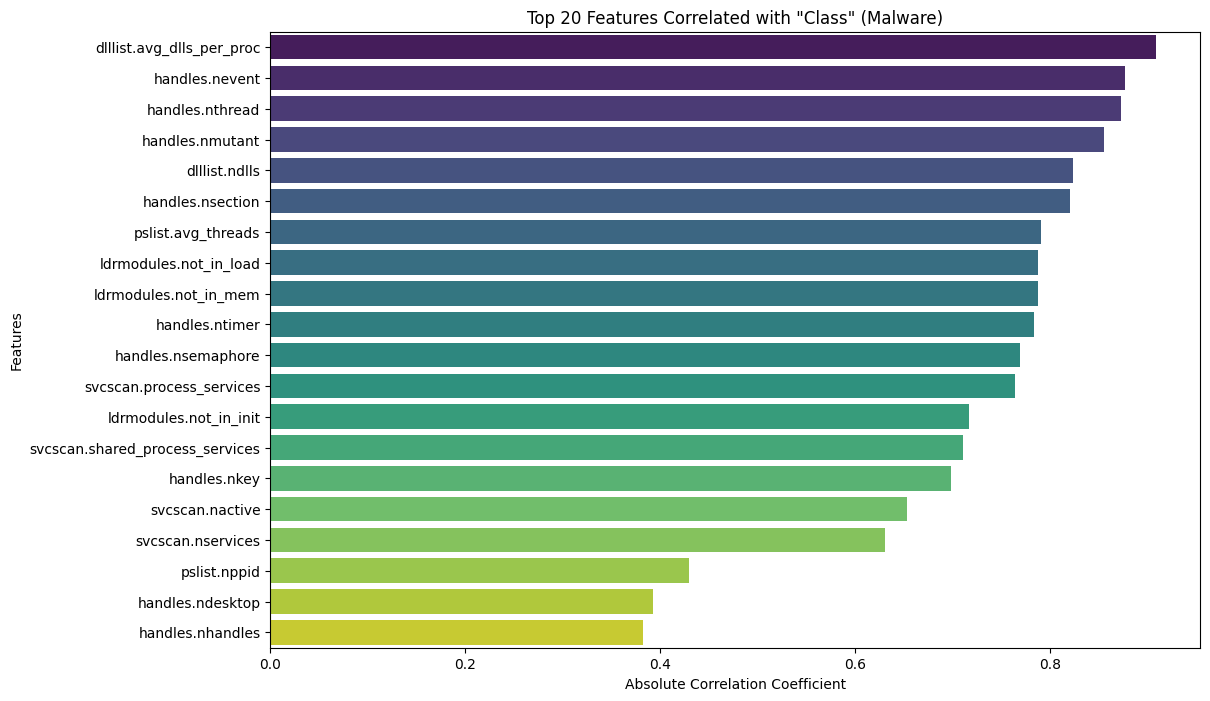

In [26]:
# Plot top 20 features
plt.figure(figsize=(12, 8))
sns.barplot(x=corr_with_target[1:21].values, y=corr_with_target[1:21].index, palette='viridis')
plt.title('Top 20 Features Correlated with "Class" (Malware)')
plt.xlabel('Absolute Correlation Coefficient')
plt.ylabel('Features')
plt.show()

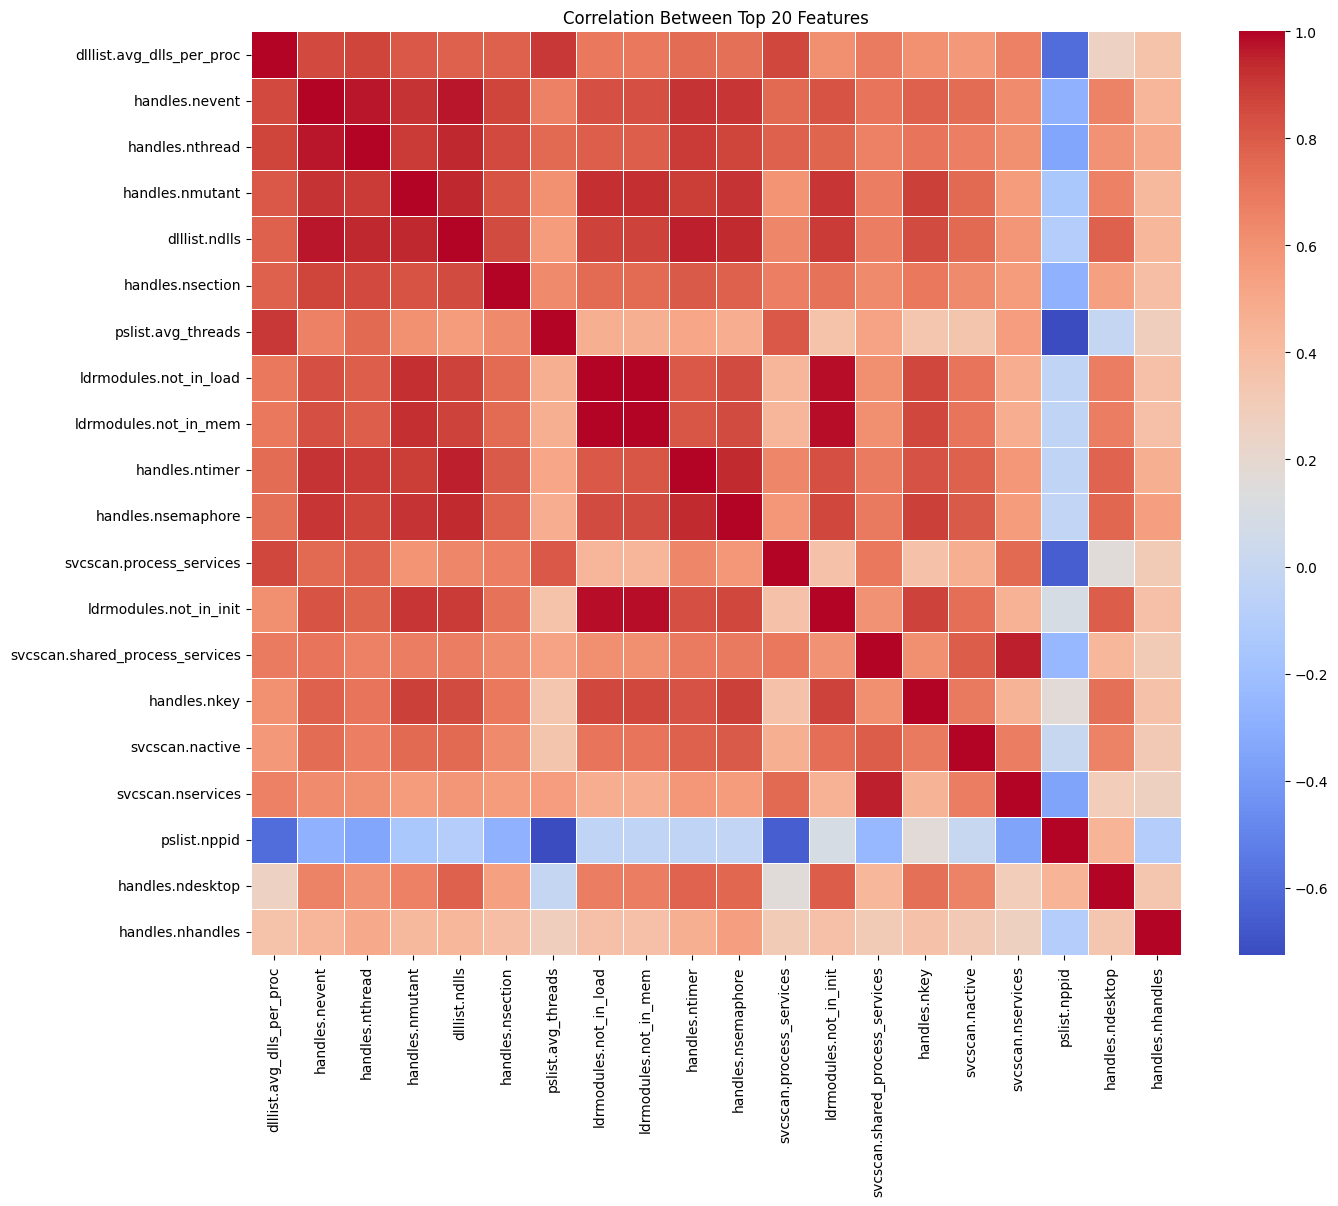

In [27]:
# Select top 20 features (excluding 'Class' itself)
top_features = corr_with_target[1:21].index.tolist()

# Compute correlation matrix for top features
corr_matrix = df[top_features].corr()

# Plot
plt.figure(figsize=(15, 12))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Between Top 20 Features')
plt.show()

### What is Mutual Information (MI)?

    - Definition: MI measures how much information the presence/absence of a feature contributes to correctly predicting the target variable (Class in your case).
    - Key Property: Unlike correlation (which only captures linear relationships), MI can detect non-linear relationships between features and the target.
    - Range: MI values range from 0 (no dependency) to 1 (perfect dependency).


In [29]:
from sklearn.feature_selection import mutual_info_classif
X = df.drop('Class', axis=1)  # Features
y = df['Class']               # Target (Malware/Benign)
# Compute MI scores
mi_scores = mutual_info_classif(X, y, random_state=42)

# Create a Series with feature names and MI scores
mi_series = pd.Series(mi_scores, index=X.columns, name='MI Scores')
mi_series = mi_series.sort_values(ascending=False)

# Display top 20 features
print("Top Features by Mutual Information:\n")
print(mi_series.head(20))

Top Features by Mutual Information:

svcscan.nservices                  0.686237
svcscan.shared_process_services    0.680558
svcscan.kernel_drivers             0.674254
dlllist.avg_dlls_per_proc          0.672384
handles.avg_handles_per_proc       0.658659
pslist.avg_handlers                0.654935
handles.nmutant                    0.649653
handles.nevent                     0.641760
handles.nsection                   0.640982
handles.nkey                       0.629620
handles.nhandles                   0.629425
dlllist.ndlls                      0.627724
handles.nsemaphore                 0.620677
handles.ntimer                     0.605522
pslist.avg_threads                 0.605253
handles.nfile                      0.588945
handles.nthread                    0.585350
ldrmodules.not_in_load             0.584697
ldrmodules.not_in_mem              0.582849
ldrmodules.not_in_load_avg         0.558246
Name: MI Scores, dtype: float64


### Why Use It for Malware Detection?

    - Non-Linear Relationships:
        Malware behavior often involves complex, non-linear patterns (e.g., thresholds in malfind.ninjections).
        MI can identify features that correlation might miss.

    - Feature Ranking:
        Rank features by MI scores to prioritize the most informative ones for your model.

    - Dimensionality Reduction:
        Remove low-MI features to reduce noise and improve model efficiency.


C:\Users\Naruto\AppData\Local\Temp\ipykernel_2920\2605459394.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mi_series.head(20).values, y=mi_series.head(20).index, palette='rocket')


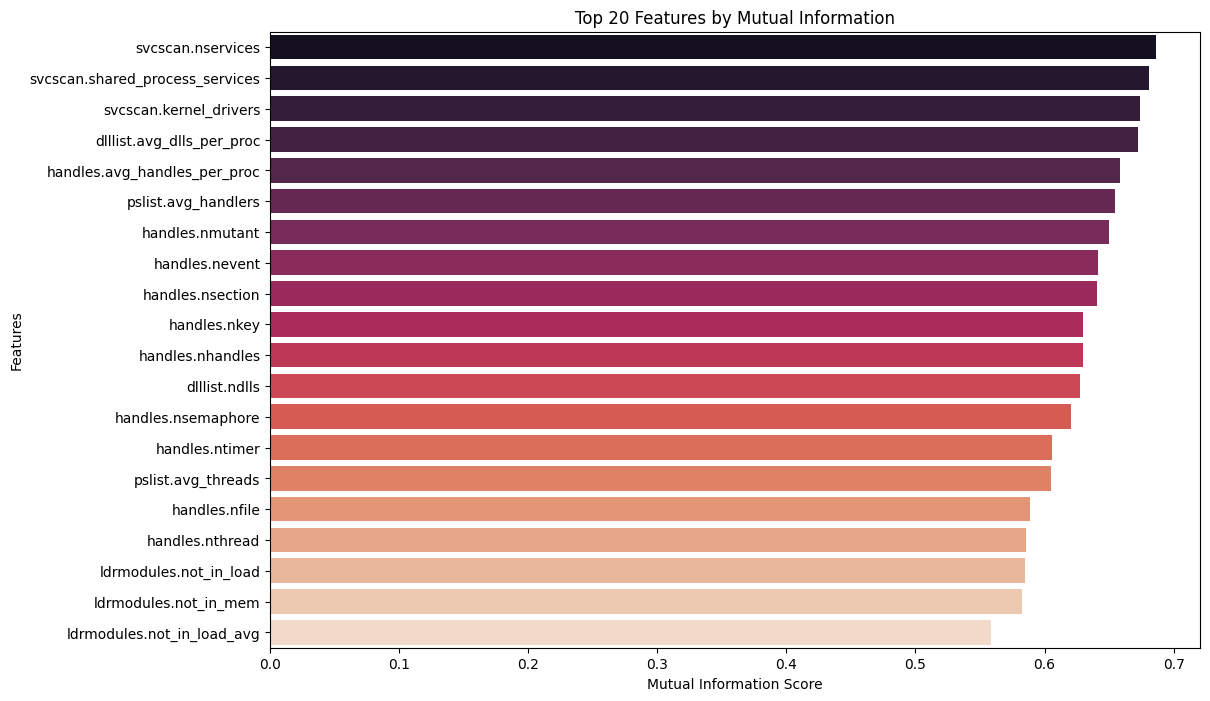

In [30]:
plt.figure(figsize=(12, 8))
sns.barplot(x=mi_series.head(20).values, y=mi_series.head(20).index, palette='rocket')
plt.title('Top 20 Features by Mutual Information')
plt.xlabel('Mutual Information Score')
plt.ylabel('Features')
plt.show()

In [32]:
top_mi = mi_series.head(20).index.tolist()
top_corr = corr_with_target[0:20].index.tolist()  # Skip "Class"
combined_features = list(set(top_mi + top_corr))

In [33]:
# Compute inter-feature correlations
corr_matrix = df[combined_features].corr().abs()

# Identify pairs with correlation > 0.8
redundant_pairs = np.where(corr_matrix > 0.8)
redundant_pairs = [(corr_matrix.columns[x], corr_matrix.columns[y]) 
                   for x, y in zip(*redundant_pairs) if x != y and x < y]

# Drop one from each pair (e.g., keep the one with higher MI/correlation)
features_to_drop = [pair[1] for pair in redundant_pairs]
final_features = [f for f in combined_features if f not in features_to_drop]

In [36]:
top_corr

['Class',
 'dlllist.avg_dlls_per_proc',
 'handles.nevent',
 'handles.nthread',
 'handles.nmutant',
 'dlllist.ndlls',
 'handles.nsection',
 'pslist.avg_threads',
 'ldrmodules.not_in_load',
 'ldrmodules.not_in_mem',
 'handles.ntimer',
 'handles.nsemaphore',
 'svcscan.process_services',
 'ldrmodules.not_in_init',
 'svcscan.shared_process_services',
 'handles.nkey',
 'svcscan.nactive',
 'svcscan.nservices',
 'pslist.nppid',
 'handles.ndesktop']

In [37]:
top_mi

['svcscan.nservices',
 'svcscan.shared_process_services',
 'svcscan.kernel_drivers',
 'dlllist.avg_dlls_per_proc',
 'handles.avg_handles_per_proc',
 'pslist.avg_handlers',
 'handles.nmutant',
 'handles.nevent',
 'handles.nsection',
 'handles.nkey',
 'handles.nhandles',
 'dlllist.ndlls',
 'handles.nsemaphore',
 'handles.ntimer',
 'pslist.avg_threads',
 'handles.nfile',
 'handles.nthread',
 'ldrmodules.not_in_load',
 'ldrmodules.not_in_mem',
 'ldrmodules.not_in_load_avg']